<a href="https://colab.research.google.com/github/akiabe/udemy_PyTorch_DNN/blob/master/pytorch_linear_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target.shape

(569,)

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [ ]:
N, D = X_train.shape
print(N, D)

381 30


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid()
)

In [ ]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))

In [ ]:
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [ ]:
print(y_train.shape)
print(y_test.shape)

torch.Size([381])
torch.Size([188])


In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(y_train.shape)
print(y_test.shape)

torch.Size([381, 1])
torch.Size([188, 1])


In [ ]:
n_epochs = 1000

train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):
  optimizer.zero_grad()

  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  loss.backward()
  optimizer.step()

  outputs_test = model(X_test)
  loss_test = criterion(outputs_test, y_test)

  train_losses[it] = loss.item()
  test_losses[it] = loss_test.item()

  if (it+1) % 50 == 0:
    print(f"Epoch {it+1}/{n_epochs}, Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}")

Epoch 50/1000, Train Loss: 0.4923, Test Loss: 0.4791
Epoch 100/1000, Train Loss: 0.3663, Test Loss: 0.3510
Epoch 150/1000, Train Loss: 0.2971, Test Loss: 0.2823
Epoch 200/1000, Train Loss: 0.2527, Test Loss: 0.2391
Epoch 250/1000, Train Loss: 0.2217, Test Loss: 0.2094
Epoch 300/1000, Train Loss: 0.1990, Test Loss: 0.1877
Epoch 350/1000, Train Loss: 0.1816, Test Loss: 0.1712
Epoch 400/1000, Train Loss: 0.1678, Test Loss: 0.1582
Epoch 450/1000, Train Loss: 0.1566, Test Loss: 0.1478
Epoch 500/1000, Train Loss: 0.1474, Test Loss: 0.1393
Epoch 550/1000, Train Loss: 0.1396, Test Loss: 0.1321
Epoch 600/1000, Train Loss: 0.1329, Test Loss: 0.1261
Epoch 650/1000, Train Loss: 0.1271, Test Loss: 0.1209
Epoch 700/1000, Train Loss: 0.1220, Test Loss: 0.1164
Epoch 750/1000, Train Loss: 0.1175, Test Loss: 0.1125
Epoch 800/1000, Train Loss: 0.1135, Test Loss: 0.1090
Epoch 850/1000, Train Loss: 0.1099, Test Loss: 0.1059
Epoch 900/1000, Train Loss: 0.1067, Test Loss: 0.1032
Epoch 950/1000, Train Loss: 0

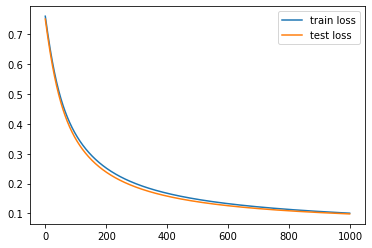

In [ ]:
plt.plot(train_losses, label="train loss")
plt.plot(test_losses, label="test loss")
plt.legend()
plt.show()

In [ ]:
with torch.no_grad():
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)
  
  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9869, Test acc: 0.9734


In [ ]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3980, -0.5270, -0.4682, -0.2984, -0.0891, -0.2775, -0.3630, -0.2017,
                       -0.2268,  0.5125, -0.3238,  0.1405, -0.2352, -0.4067, -0.1517,  0.1478,
                        0.0023, -0.1782,  0.0802,  0.4583, -0.3782, -0.4835, -0.2441, -0.2727,
                       -0.4553, -0.4056, -0.1700, -0.2719, -0.4084, -0.2447]])),
             ('0.bias', tensor([0.5453]))])

In [ ]:
torch.save(model.state_dict(), "model.pt")

In [ ]:
!ls

drive  model.pt  sample_data


In [ ]:
model2 = nn.Sequential(
    nn.Linear(D,1),
    nn.Sigmoid()
)
model2.load_state_dict(torch.load("model.pt"))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(y_train.numpy() == p_train)
  
  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(y_test.numpy() == p_test)
print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9869, Test acc: 0.9734
